<a href="https://colab.research.google.com/github/perpendicooler/fiverr_client/blob/main/fiverr_client.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 2 - Due Novemeber 30 at 1:00 PM
***

## Exam Rules:

1. You must work on the exam individually. You cannot discuss the exam with your classmates or other people. If you have questions, please ask me.
2. You can use the internet to help you. However, you cannot post the questions or ask for help direclty on any internet forum.
3. If you use code you found on the internet, or used ChaptGPT or equivialent to generate code, then you must cite the code and explain the code line-by-line. No credit will be given for copied code without proper citations and explaination.
4. Your jupyter notebook file must be turned in on the gradescope website before 1:00 PM on Novemeber 30, 2023. A 1 point dediction will be made for each minute late. If you are ill, or have special circumstances, please contact me before 11:59 PM on Nov 28 to make arrangements.
***

## Problem 1 (35 points):

The catalytic oxidative dehydrogenation of 1-butane to form 1,3-butadiene (an important chemical used in the production of synthetic rubber) occurs in a PFR over a Bi-Mo catalyst with the following reactions:

$$
\text{1-butuene} \overset{k_1}{\underset{k_2}{\longleftrightarrow}} \text{trans-2-butene}\\
\\
\text{trans-2-butuene} \overset{k_3}{\longrightarrow} \text{1,3-butadiene}\\
$$

All reactions are first order with the following set of rate constants (in units of $s^{-1}$).

$k_1$ = 9.0	$k_2$ = 6.0	$k_3$ = 3.0

Given that the initial concentration of 1-butene is 1000 mol/m^3, create a plot of the concentration of each species as a function of the reactor space-time between $\tau$= 0 and $\tau$ = 1 (you may neglect any change in the number of moles of gas that occur) using the following methods.

**(A) 4th-order Runge-Kutta**

**(B)** `scipy`

Hint: Given A = 1-butene, B = trans-2-butene, and C = 1,3-butadiene the differential equations can be expressed by the following.

$$
\begin{align}
\frac{dA}{d\tau} &= -k_1 A + k_2 B\\
\\
\frac{dB}{d\tau} &= k_1 A - k_2 B - k_3 B\\
\\
\frac{dC}{d\tau} &= k_3 B
\end{align}
$$

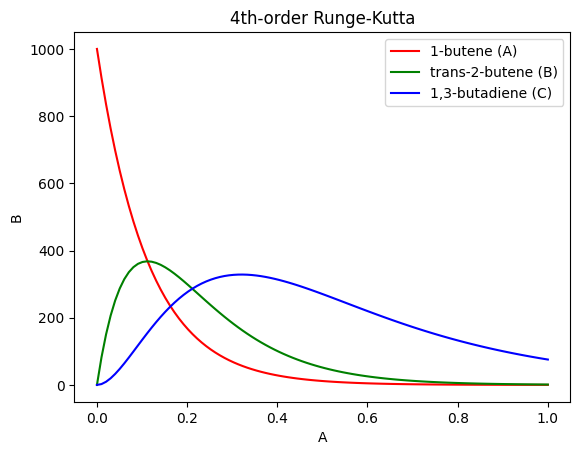

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
k1 = 9.0
k2 = 6.0
k3 = 3.0

def catalytic(A, B, C, t):
    dA_dt= -k1 * A
    dB_dt = k1 * A - k2 * B -k3 * B
    dC_dt = k2 * B - k3 * C
    return dA_dt, dB_dt, dC_dt

def RK_4System(A, B, C, t, h):
    k1A, k1B, k1C = catalytic(A, B, C, t)
    k2A, k2B, k2C = catalytic(A + 0.5 * h * k1A, B + 0.5 * h * k1B, C + 0.5 * h * k1C, t + 0.5 * h)
    k3A, k3B, k3C = catalytic(A + 0.5 * h * k2A, B + 0.5 * h * k2B, C + 0.5 * h * k2C, t + 0.5 * h)
    k4A, k4B, k4C = catalytic(A + h * k3A, B + h * k3B, C + h * k3C, t + h)

    A_new = A + (h / 6.0) * (k1A + 2 * k2A + 2 * k3A + k4A)
    B_new = B + (h / 6.0) * (k1B + 2 * k2B + 2 * k3B + k4B)
    C_new = C + (h / 6.0) * (k1C + 2 * k2C + 2 * k3C + k4C)

    return A_new, B_new, C_new


t_values = np.linspace(0, 1, 100)
h = 0.01
A, B, C = (1000, 0.0, 0.0)
A_values, B_values, C_values = [], [], []

for t in t_values:
    A_values.append(A)
    B_values.append(B)
    C_values.append(C)

    A, B, C = RK_4System(A, B, C, t, h)

plt.plot(t_values, A_values, "r", label='1-butene (A)')
plt.plot(t_values, B_values, "g", label='trans-2-butene (B)')
plt.plot(t_values, C_values, "b", label='1,3-butadiene (C)')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.title('4th-order Runge-Kutta')
plt.show()

***
## Problem 2 (35 points):

The velocity profile of a fluid flowing through a cylindrical pipe is dependent on the fluid's density, viscocity and the pressure applied to the system.

Using the equations shown below, plot the steady-state velocity profile for each of the following cases: (Note all are reported in SI units):

**Part (A)** Using the Finite Difference Method.

**Part (B)** Using `scipy`.

| Material | Viscosity ($\mu$) | Denisty ($\rho$) | Pipe $r$ | Pressure $\Delta p$|
| :- | :-: | :-: | :-: | :-: |
|Water| 0.001 | 1000 | 0.01| 500|
|Water| 0.001 | 1000 | 0.01| 2000|
|Water| 0.001 | 1000 | 0.02| 2000|
|Glycerol| 15 | 1260 | 0.01| 500|
|Glycerol| 15 | 1260 | 0.01| 2000|
|Glycerol| 15 | 1260 | 0.02| 2000|

Governing Equation:

$$
\mu\left(\frac{d^2v}{dr^2} + \frac{1}{r} \frac{dv}{dr}\right) = -\Delta p
$$

**Hint:** To solve this problem, use the no-slip boundary condition, which states that the velocity on the pipe wall is zero

***
## Problem 3 (30 Points):

In American Football, a field goal kicker needs to kick a football from the ground over a goal-post that is 3 m high.

The system of differential equations that can descirbe a projectile in motion (assuming no wind resistance) is as follows.

$$
\frac{d^2x}{dt} = 0 \\
\frac{d^2y}{dt} = -g\\
$$

Where $x$ is the distance the ball travels, and $y$ the height that the ball travels.

Assume that the kicker can kick the ball perfectly straight at a velocity of 25 m/s.

Determine what are the range of launch angles in which the kicker will make the field goal from 50 m away using...

**(A) 4th Order Runge-Kutta**

**(B)** `scipy`


In [ ]:
from scipy.integrate import odeint

  # Constants
g = 9.8  # Acceleration due to gravity (m/s^2)
v0 = 25.0  # Initial velocity (m/s)
distance_to_goal = 50.0  # Distance to the goal (m)
goal_height = 3.0  # Height of the goal post (m)

# Function to define the system of differential equations for projectile motion
def projectile_motion_scipy(u, t):
    # u[0] = x, u[1] = y, u[2] = dx/dt, u[3] = dy/dt
    dxdt = u[2]
    dydt = u[3]
    dvxdt = 0.0
    dvydt = -g
    return [dxdt, dydt, dvxdt, dvydt]

# Lists to store results
angles_for_goal_scipy = []

# Range of launch angles to check
for angle in range(1, 90):
    u0 = [0.0, 0.0, v0 * np.cos(np.radians(angle)), v0 * np.sin(np.radians(angle))]
    t_values = np.linspace(0, 10, 1000)  # Adjust the time values as needed
    result = odeint(projectile_motion_scipy, u0, t_values)

    # Check if the goal is made
    if abs(result[-1, 1] - goal_height) < 0.1 and result[-1, 0] >= distance_to_goal:
        angles_for_goal_scipy.append(angle)

# Plot the results
plt.plot(angles_for_goal_scipy, label='Launch Angles (scipy)')
plt.xlabel('Launch Angles (degrees)')
plt.ylabel('Goal Made')
plt.title('Launch Angles for Making the Field Goal (scipy)')
plt.legend()
plt.show()


NameError: ignored